In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data_sets\pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Data Wrangling Step
we will use pandas melt method to unpivot the type_1 and type_2 columns from wide to long

In [3]:
pkmn_types = df.melt(id_vars=['id', 'species'],
                    value_vars=['type_1','type_2'],
                    var_name='type_level',
                    value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


Find the frequency of unique values in the type column

In [4]:
#count the frequency of unique values in the ttype column of the pkmn_types dataframe.
#By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [5]:
#get the unique values of the type column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

## plot the horizontal bar charts
we plot a bar chart showing the Absolute frequency of the types

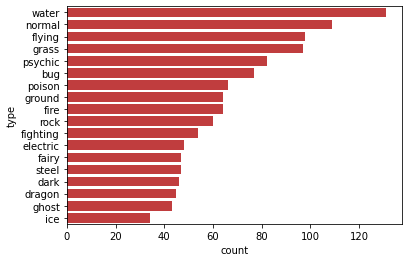

In [6]:
base_color = sns.color_palette()[3]
sns.countplot(data=pkmn_types, y ='type',color=base_color, order=type_order);

Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

In [7]:
#returns the sum of all not null values in the type column
n_pokemon = pkmn_types['type'].value_counts().sum()

#return the highest frequency in the type column
max_type_count = type_counts[0]

#return the maximum proportion, or in other words
#compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


Create an array of evenly spaced proportioned values on the x-axis.

In [8]:
#use numpy.arange() function to produce a set of evenly spaced proportioned values
#between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

## create a list of string values that can be used as tick labels.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details

In [9]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number
tick_names = ['{:0.2f}'.format(i) for i in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.

## plot the bar chart, with new x-tick labels

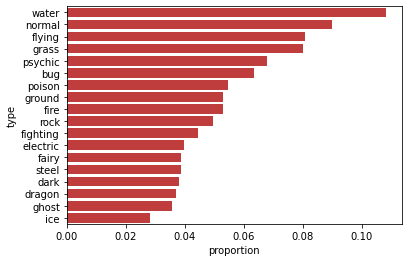

In [10]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
#change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

## Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

## Print the text (proportion) on the bars of a horizontal plot.

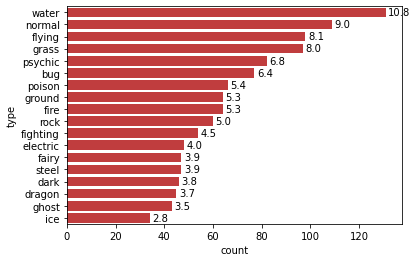

In [11]:
#considering the same chart above, print the text (proportion) on the bars
base_color = sns.color_palette()[3]
sns.countplot(data=pkmn_types, y='type',color=base_color, order=type_order);

#logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
    
    #remember type_counts contains the frequency of unique values in the 'type' column in decreasing order.
    count = type_counts[i]
    #convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    #print the string value on the bar.
    #Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

## print the text (proportion) below the bars of a vertical plot.

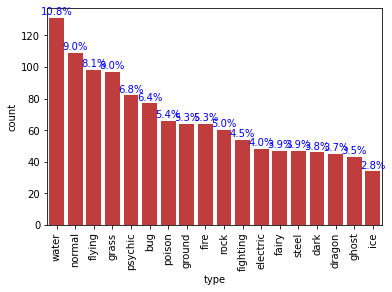

In [12]:
#considering the same chart from the chart above print the text (proportion) below the bar
base_color = sns.color_palette()[3]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);
plt.rcParams['figure.figsize'] = 12,4

#recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

#get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

#loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    #get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    #print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='blue')
    

I use the .get_text() method to obtain the category name, so I can get the count of each category level. At the end, I use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

 Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:

In [13]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

## plot a simple pie chart

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

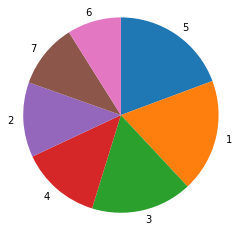

In [14]:
sorted_counts = df['generation_id'].value_counts()

plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')

In [15]:
# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis


To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the pie could end up looking oval-shaped, rather than a circle.

## TO DO
Did you notice the various arguments in the plt.pie() function? Particularly, the labels = sorted_counts.index argument represents a list of strings serving as labels for each wedge. In the example above, the labels have used the following list:

#### Can you try using another list of strings, ['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], to display labels on each wedge?

In [16]:
sorted_counts.index = ['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6']

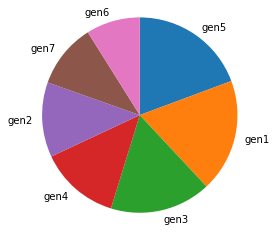

In [17]:
plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

## plot a simple Donut plot

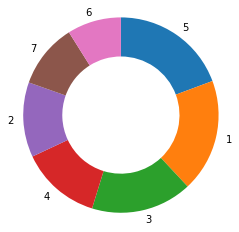

In [18]:
sorted_counts = df['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

## plot histogram on the speed column

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

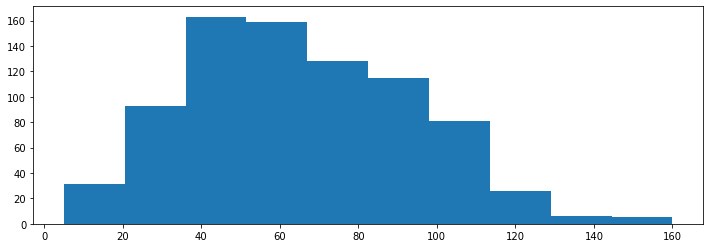

In [19]:
# we have intentionally not put a semicolon at the end of the statement below to see the bar width
plt.hist(data = df, x ='speed')

You can use descriptive statistics (e.g. via dataframe['column'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function

In [20]:
df['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

## Histogram with fixed number of bins

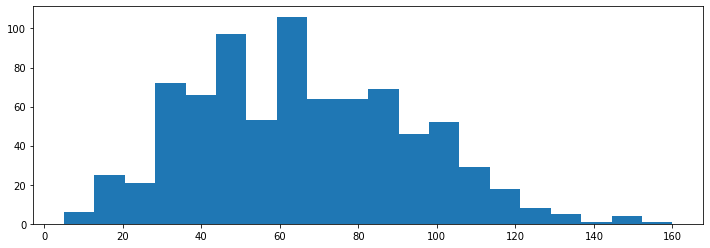

In [21]:
plt.hist(data=df, x='speed', bins = 20);

## Histogram with dynamic number of bins

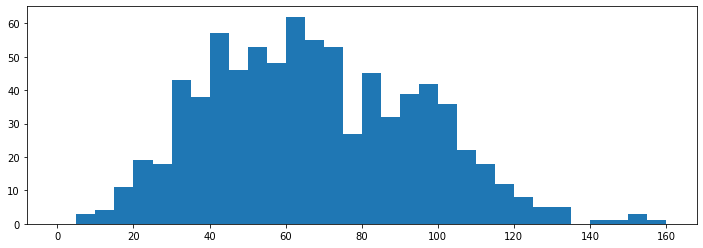

In [22]:
#create bins with step size 5
bins = np.arange(0, df['speed'].max()+5, 5)
plt.hist(data=df, x='speed', bins=bins);

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+5" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

## plot the similar histogram with seaborn's displot()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


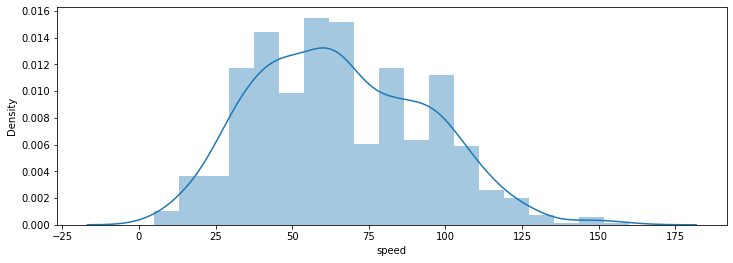

In [23]:
sns.distplot(df['speed']);

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

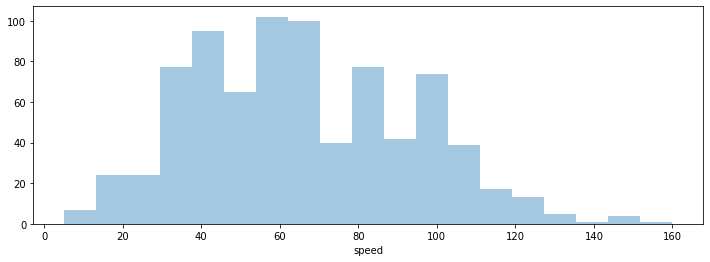

In [24]:
sns.distplot(df['speed'], kde=False)

## Plot two histograms side-by-side

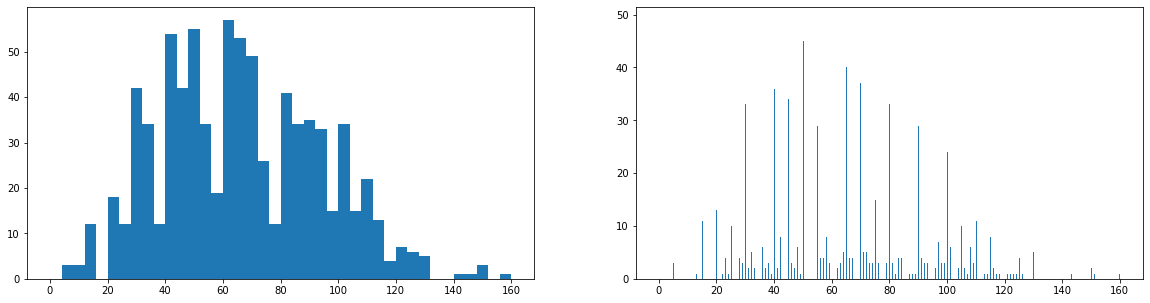

In [25]:
#resize the chart and have two plots side by side
#set a larger figure size for subplots
plt.figure(figsize = [20, 5])

#histogram on left, example of too large bin size
# 1 row, 2cols, 1 subplot
plt.subplot(1,2,1)
bins = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data=df,x='speed',bins=bins);


#histogram on right, example of too small bin size
plt.subplot(1,2,2)
bins = np.arange(0,df['speed'].max()+1/4, 1/4)
plt.hist(data=df,x='speed',bins=bins);

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots.

## Plot the histogram from the data having a skewed distribution of values

In [28]:
df.height.describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

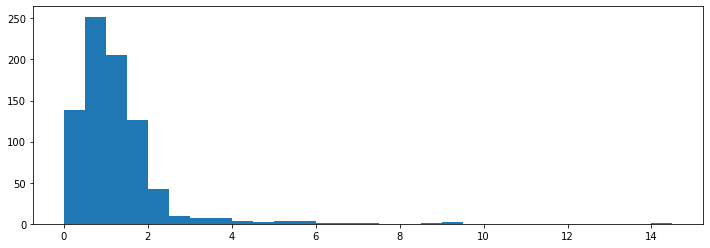

In [32]:
#get the ticks for bins between [0-15], at an interal of 0.5
bins = np.arange(0, df['height'].max()+0.5,0.5)

#plot the histogram for the height column
plt.hist(data=df, x='height', bins=bins);

## Plot the histogram with a changed axis limit.

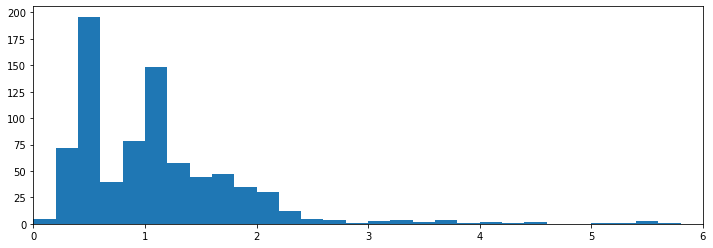

In [33]:
#get the ticks for bins between [0-15], at an interal of 0.5
bins = np.arange(0, df['height'].max()+0.2,0.2)

#plot the histogram for the height column
plt.hist(data=df, x='height', bins=bins);

#set the upper and lower bounds of the bins that are displayed in the plot
#refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
#the argument represents a tuple of the new x-axis limits.
plt.xlim((0,6));

## TO DO: Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side.

(0.0, 6.0)

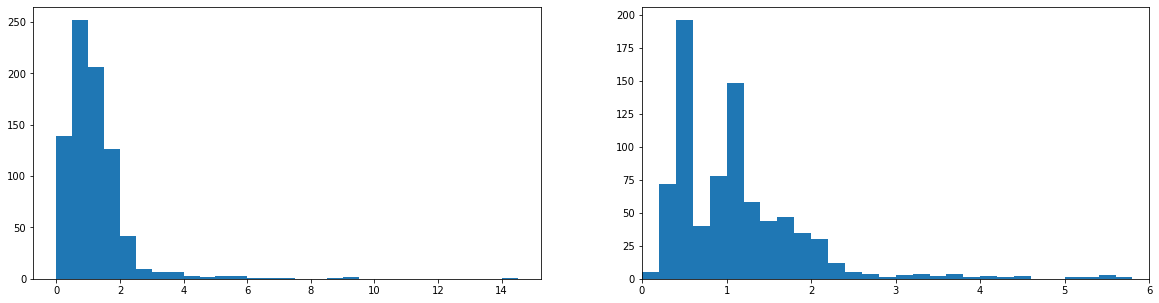

In [35]:
#define the figsize
plt.figure(figsize=[20,5])

#histogram on left: full data
plt.subplot(1,2,1)
bins = np.arange(0, df.height.max()+0.5, 0.5)
plt.hist(data=df, x='height',bins=bins)

#histogram on right: focus in on bulk of data < 6

plt.subplot(1,2,2)
bins = np.arange(0, df.height.max()+0.2, 0.2)
plt.hist(data=df, x='height',bins=bins)
plt.xlim((0,6)) # could also be called plt.xlim(0,6)

## Scales and Transformations

Text(0.5, 0, 'The x-axis limits are NOT changed. They are only scaled to log-type')

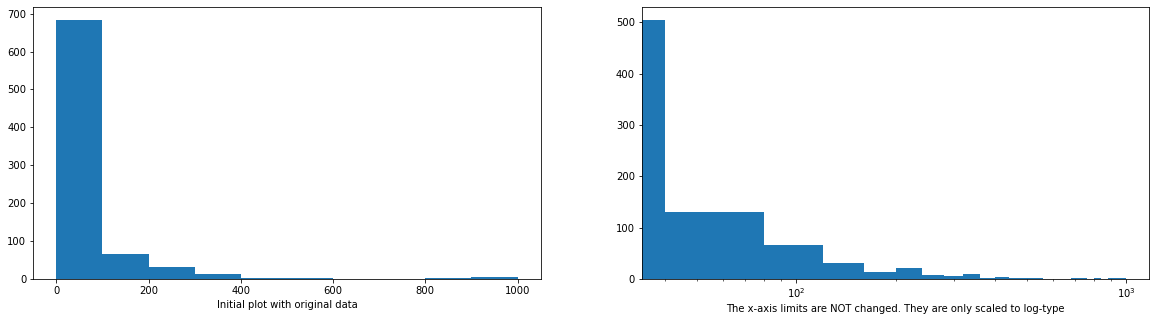

In [37]:


plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=df, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, df['weight'].max()+40, 40)
plt.hist(data=df, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits are NOT changed. They are only scaled to log-type')

In [38]:
#describe the data
df['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

Notice two things about the right histogram of example 1 above, now.

Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicative. Matplotlib's xscale function includes a few built-in transformations: we have used the 'log' scale here.
Secondly, the default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead.

To address the second issue of interpretation of x-axis ticks, the scale transformation is the solution. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

## Scale the x-axis to log-type, and change the axis limit.

In [39]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(df['weight'].describe())


count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

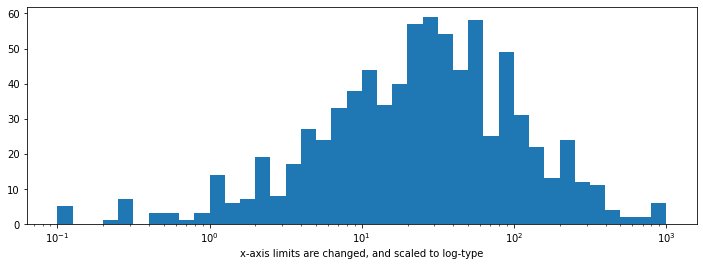

In [42]:
# axis transformation
#bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='weight', bins=bins);

# the argument in the xscale() reps the axis scale type to apply.
#the possible values are: {'linear', 'log', 'symlog','logit'...}
plt.xscale('log')

#apply xaxis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

## Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

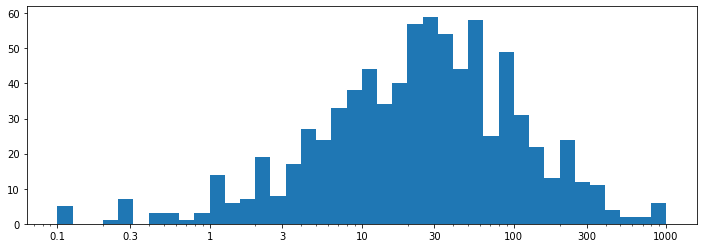

In [43]:
bins = 10**np.arange(-1, 3+0.1,0.1)

#generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

#plot the histogram
plt.hist(data=df, x='weight', bins=bins);

#the argument in the xscale() reps the axis scale type to apply
plt.xscale('log')

#apply x-ticks
plt.xticks(ticks, labels);

Observation - We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

For the ticks, we have used xticks() to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

It is important that the xticks are specified after xscale since that function has its own built-in tick

## Alternative Approach
Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, this Wikipedia section provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

## Custom scaling the given data Series, instead of using the built-in log scale


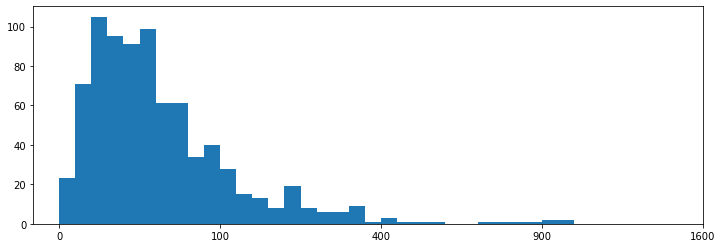

In [45]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(df['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(df['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(df['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

Note that data is a pandas Series, so we can use the apply method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of xticks instead.

## Kernel Density Estimation

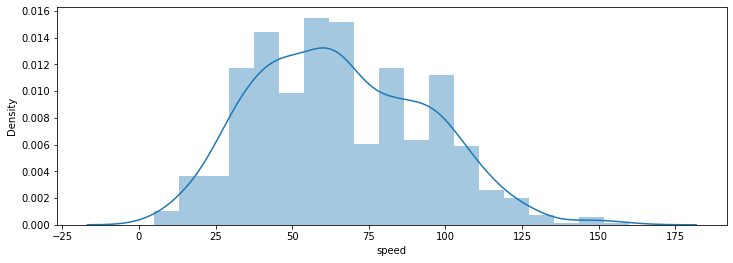

In [47]:
#Plot the Kernel Density Estimation (KDE)
# The pokemon dataset is available to download at the bottom of this page.
sns.distplot(df['speed']);


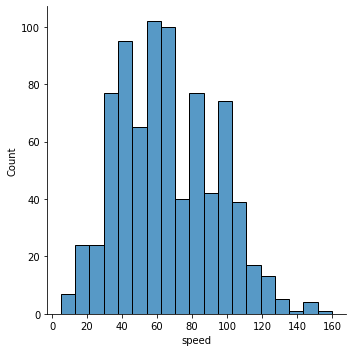

In [48]:
# Use this new function only with Seaborn 0.11.0 and above. 
# The kind argument can take any one value from {“hist”, “kde”, “ecdf”}.
sns.displot(df['speed'], kind='hist');
# Use the 'kde' kind for kernel density estimation
# sb.displot(pokemon['speed'], kind='kde');

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot(). In a rugplot, data points are depicted as dashes on a number line.

## Demonstrating distplot() and rugplot() to plot the KDE

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages

<AxesSubplot:ylabel='Density'>

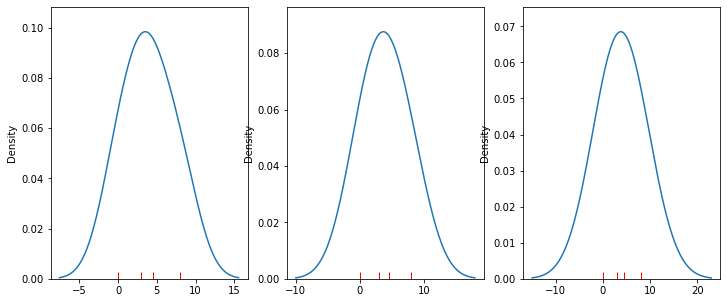

In [50]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sns.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sns.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sns.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.

## Waffle Plots
One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.